In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\Data\Gamboo\Hotel booking\hotelbookingsinfo.csv")
df.head()

,hotel,is_canceled,leadtime,arrivalyear,arrivalmonth,arrivalweeknumber,arrivaldayofmonth,staysweekendnights,staysweeknights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


According to **"Read only hotel and is_canceled columns"** requirement, Let us **push** others and just **keep** two of them

In [3]:
df = df[['hotel', 'is_canceled']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   hotel        119390 non-null  object
 1   is_canceled  119390 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


**All columns are okay, no need for preprocess**

### EDA, Visualization to get insight

In [5]:
df.groupby(by = ['hotel']).count()

,is_canceled
hotel,
City Hotel,79330
Resort Hotel,40060


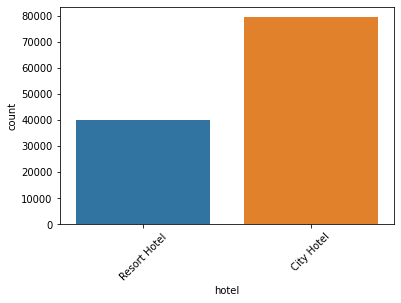

In [6]:
sns.countplot(x= 'hotel', data= df)
plt.xticks(rotation= 45)
plt.show()

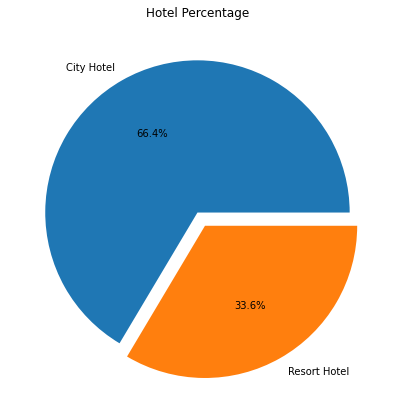

In [7]:
l = df['hotel'].value_counts().index
v = df['hotel'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(v, labels = l, autopct='%1.1f%%', explode=(0, 0.1))
plt.title('Hotel Percentage')
plt.show()

In [8]:
df.groupby(by = ['is_canceled']).count()

,hotel
is_canceled,
0,75166
1,44224


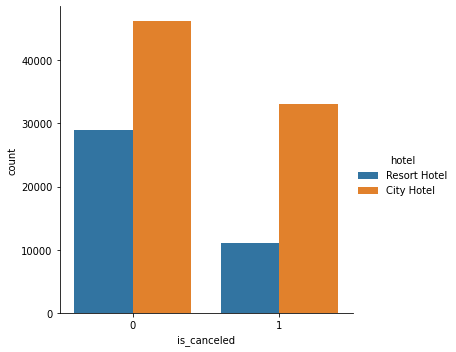

In [9]:
sns.catplot(x= 'is_canceled', kind = 'count', hue = 'hotel', data =df)
plt.show()

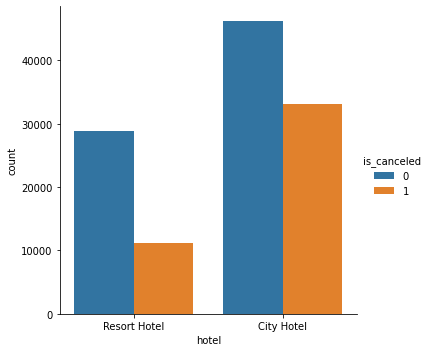

In [10]:
sns.catplot(x= 'hotel', kind = 'count', hue = 'is_canceled', data =df)
plt.show()

In [11]:
sta = pd.DataFrame(df[['hotel', 'is_canceled']].value_counts()).reset_index()
sta.rename(columns = { 0: 'ct'}, inplace=True)
sta

,hotel,is_canceled,ct
0,City Hotel,0,46228
1,City Hotel,1,33102
2,Resort Hotel,0,28938
3,Resort Hotel,1,11122


### Percentage of cancellation on hotel types

In [13]:
s = sta[sta['hotel'] == 'City Hotel']['ct']
print('CH - Cancel No: ', s[0]/s.sum())

s = sta[sta['hotel'] == 'City Hotel']['ct']
print('CH - Cancel Yes: ',s[1]/s.sum())

s = sta[sta['hotel'] == 'Resort Hotel']['ct']
print('RH - Cancel No: ',s[2]/s.sum())

s = sta[sta['hotel'] == 'Resort Hotel']['ct']
print('RH - Cancel Yes: ',s[3]/s.sum())


CH - Cancel No:  0.5827303668221354
CH - Cancel Yes:  0.41726963317786464
RH - Cancel No:  0.7223664503245132
RH - Cancel Yes:  0.27763354967548676


As can be seen, customers who booked **City Hotel** are more tend to **cancel** reservation with **41 %** rather than *27 % of Resort Hotel*

**Thanks**